# • [AI timelines deference survey](https://forum.effectivealtruism.org/posts/FtggfJ2oxNSN8Niix/when-reporting-ai-timelines-be-clear-who-you-re-not) – conducted by [Sam Clarke](https://www.governance.ai/team/sam-clarke)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from typing import List
import scipy.stats as stats 
import itertools
import functools
from utils import *

%matplotlib inline

## • Set some plotting parameters and load the data

In [2]:
default_plotting_params()

In [3]:
timelines_deference, timelines_deference_cleaned, timelines_deference_cleaned_sam_edit, \
    timelines_deference_self_other, timelines_deference_category = load_data()

## • Deference for "self" vs "other"

### Here, "self" refers to some inside view, impression, or explicit deference to oneself; "other" simply means any other individual, group of individuals (informal), or organisation (formal)

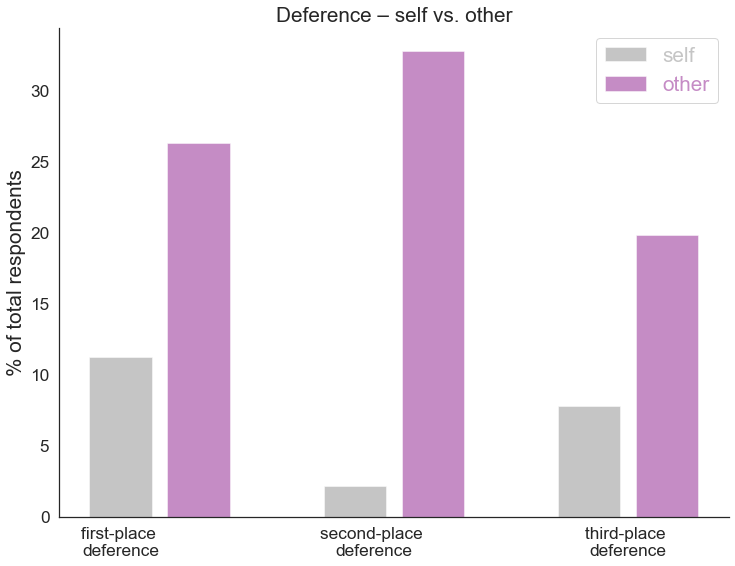

In [4]:
plot_self_vs_other(data=timelines_deference_self_other)

## • Deference by category – do respondents defer to individuals, groups of individuals, or organisations?

### Some responses indicated deference to an individual (e.g. "Ajeya Cotra"), while others referred to groups of individuals, or organisations (e.g. "Open Philanthropy")

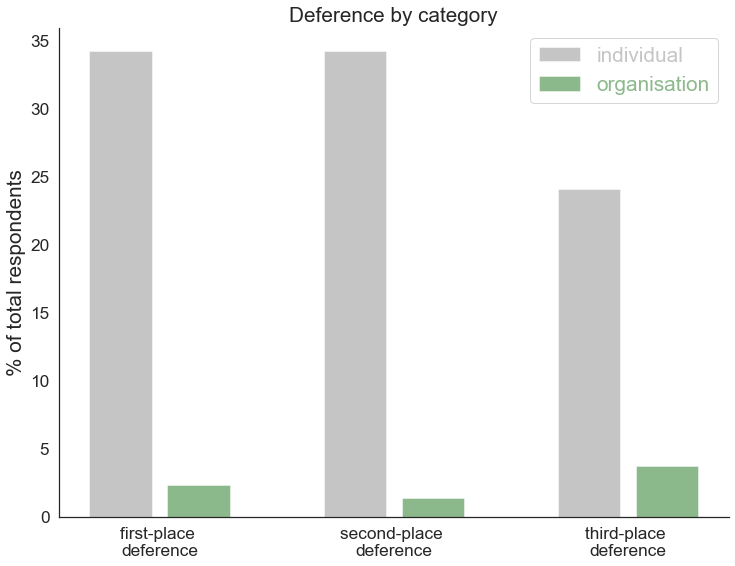

In [5]:
plot_deference_by_category(data=timelines_deference_category)

## • Visualise the responses for each deference rank

### Survey respondents reported the agents to which they deferred most, second-most, and third-most.

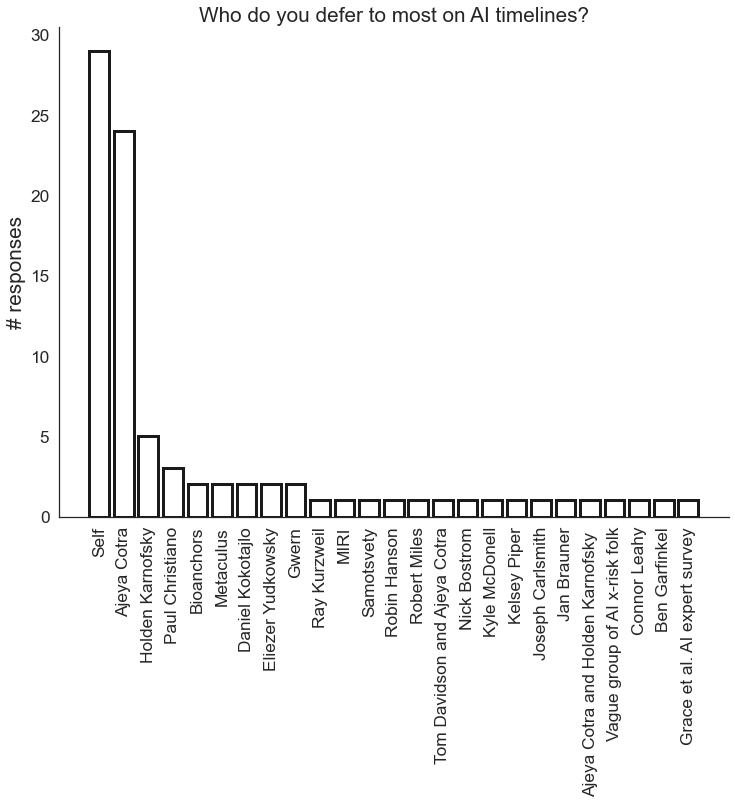

In [6]:
visualise_deference_responses(deference_rank=1, data=timelines_deference_cleaned_sam_edit, include_self_responses=True)

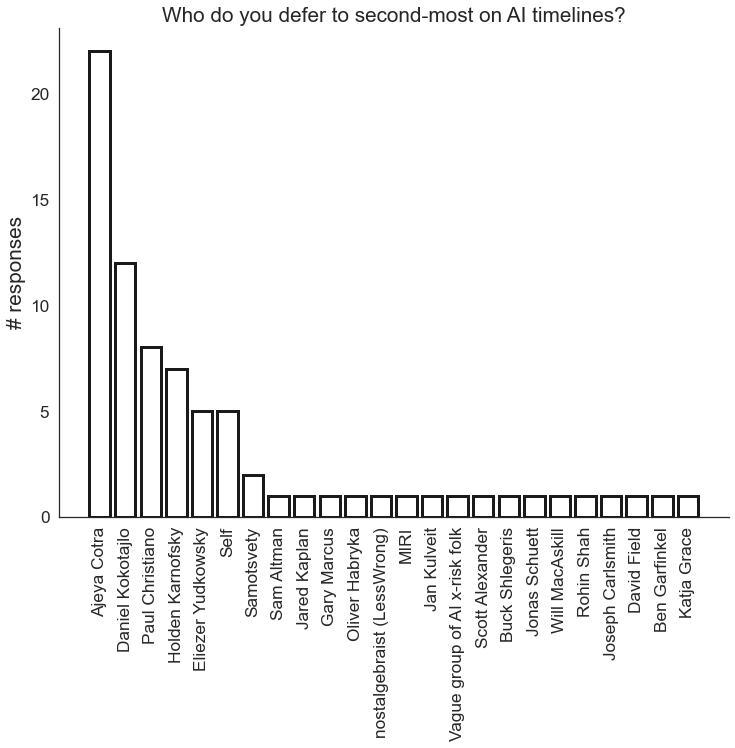

In [7]:
visualise_deference_responses(deference_rank=2, data=timelines_deference_cleaned_sam_edit, include_self_responses=True)

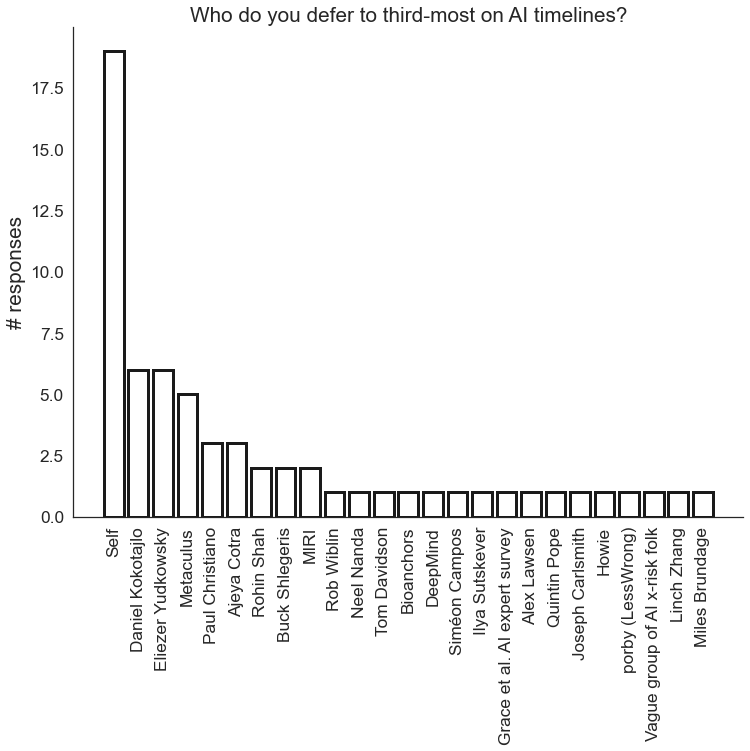

In [8]:
visualise_deference_responses(deference_rank=3, data=timelines_deference_cleaned_sam_edit, include_self_responses=True)

## • Generate a weighted score for deference:


### Trivial scoring system to create a weighted "deference score" for each individual or organisation. Three points are given for each vote in the "most deference" column, two point for "second-most", and one point for "third-most".

### $\text { Deference_simple }=n_{\text {first }}+n_{\text {second }}+n_{\text {third }}$

### $\text { Deference_score }=\left(3 \cdot n_{\text {first }}\right)+\left(2 \cdot n_{\text {second }}\right)+n_{\text {third }}$


In [9]:
counts = generate_deference_counts(timelines_deference_cleaned_sam_edit)
result = functools.reduce(lambda x, y: x.combine(y, combine_func), \
                          [counts[column_titles()[0]], counts[column_titles()[1]], counts[column_titles()[2]]])
result_ = result.sort_values(ascending=False)

## • Visualise all weighted deference score responses 

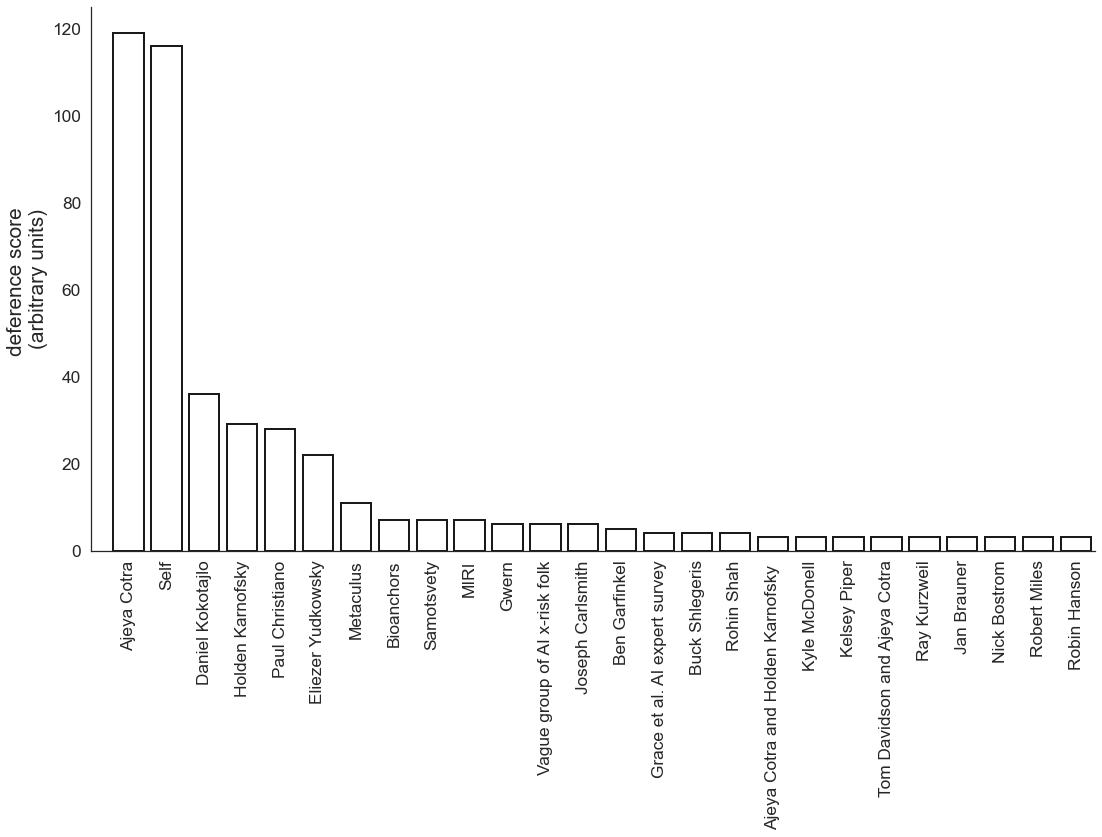

In [10]:
visualise_weighted_deference_(counts[column_titles()[0]], counts[column_titles()[1]], \
                              counts[column_titles()[2]], include_self_responses=True, \
                              xlim_=max([len(counts[column_titles()[0]]), \
                                         len(counts[column_titles()[1]]), len(counts[column_titles()[2]])])
                             )

## • Visualise the top 10 individuals/organisations deferred to (including "self" deference)

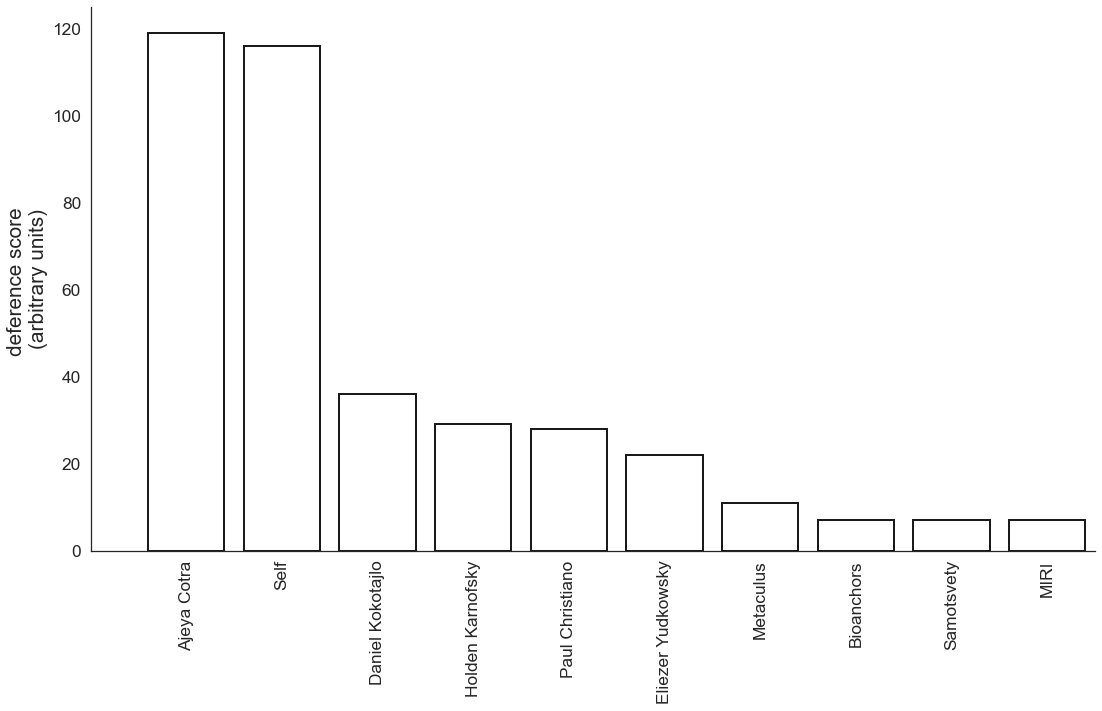

In [11]:
visualise_weighted_deference_(counts[column_titles()[0]], counts[column_titles()[1]], \
                              counts[column_titles()[2]], include_self_responses=True, xlim_=9)

## • Same format as above, but removing "self" responses

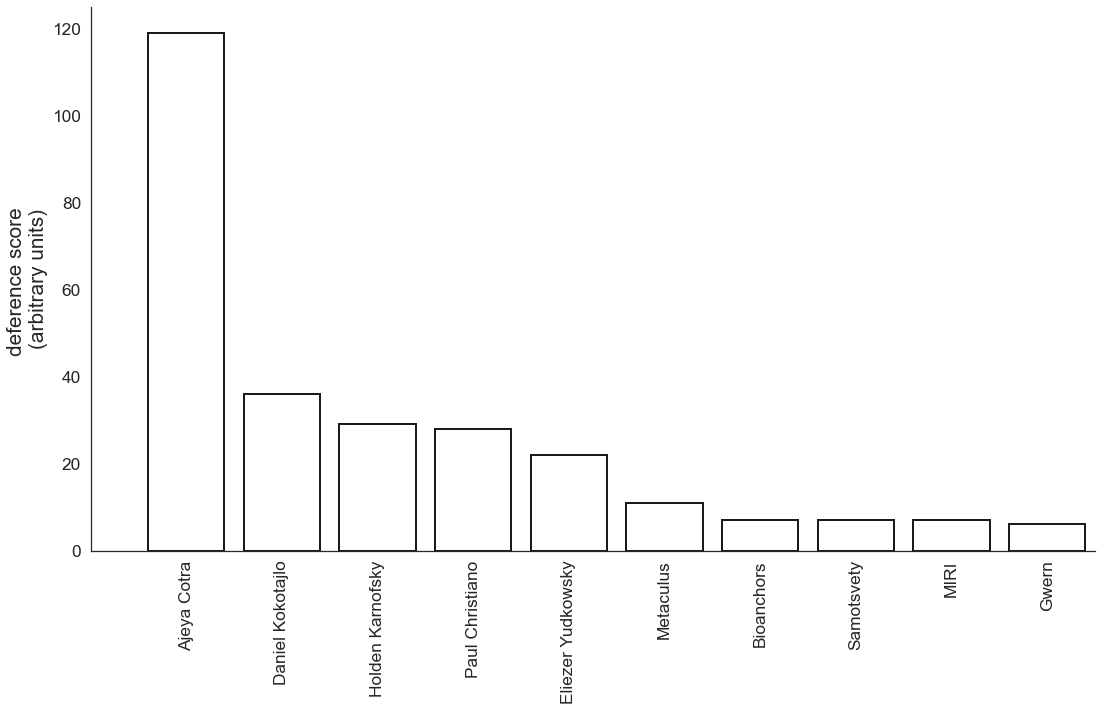

In [12]:
visualise_weighted_deference_(counts[column_titles()[0]], counts[column_titles()[1]], \
                              counts[column_titles()[2]], include_self_responses=False, xlim_=9)

## • Visualise clusters of individuals and organisations with correlated views

### Many of the individuals and organisations deferred to have correlated views (as evident by co-athored publications or direct collaboration at the same institute). Here, we (very trivially) plot some of these.

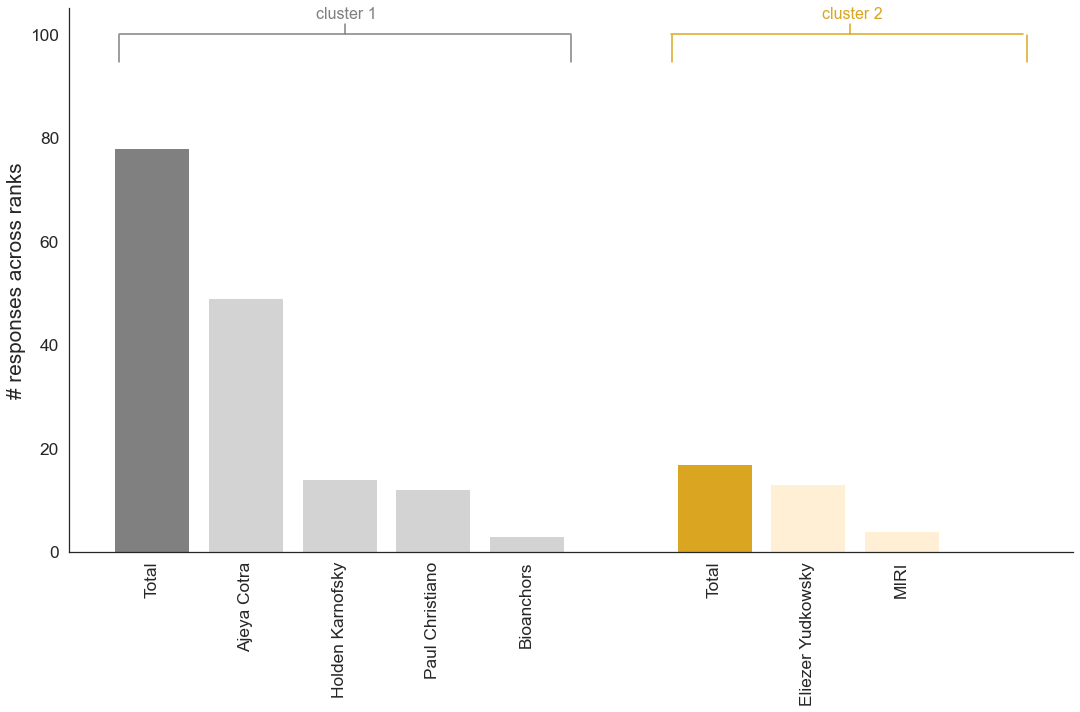

In [13]:
plot_clusters_(data=result_, include_total=True)

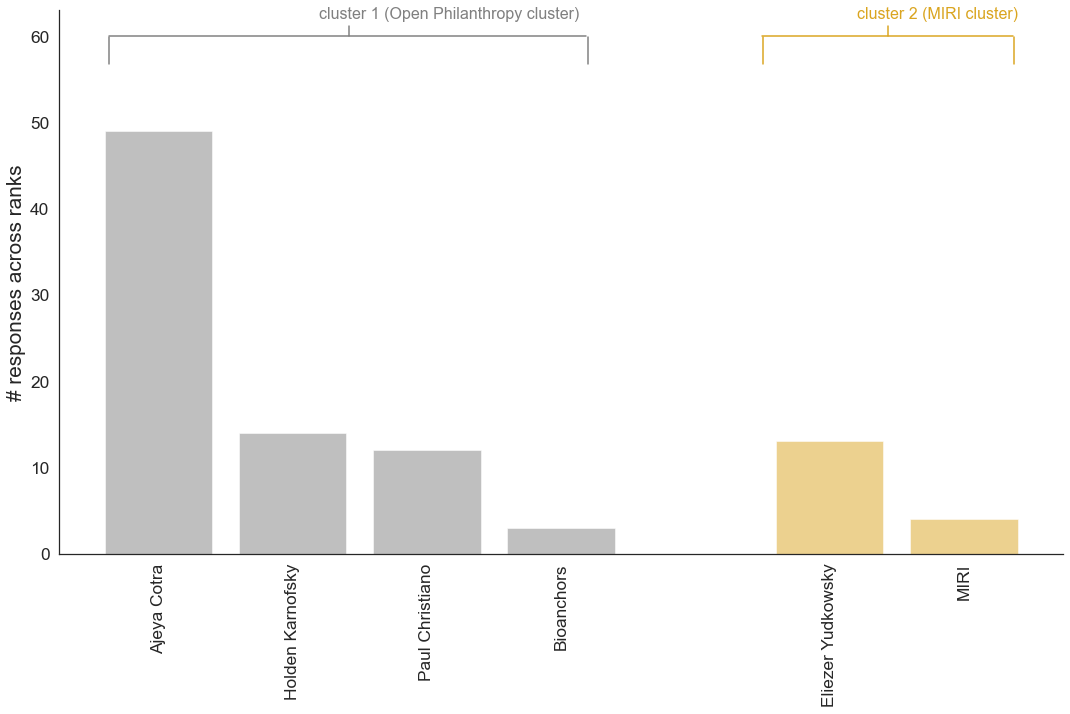

In [14]:
plot_clusters_(data=result_, include_total=False)

## • Visualise absolute number of deference responses, clustered into five main categories, defined as follows:
### • "Open Philanthropy cluster" = [Ajeya Cotra, Holden Karnofksy, Paul Christiano, Bioanchors]
### • "MIRI cluster" = [MIRI, Eliezer Yudkowsky]
### • "Self cluster" = deference responses which were simply "Self" or "Myself"
### • "Forecasting cluster" = [Metaculus, Samotsvety]
### • "Everyone else cluster" = this cluster simply represents all other individuals or organisations for whom a deference response was recorded


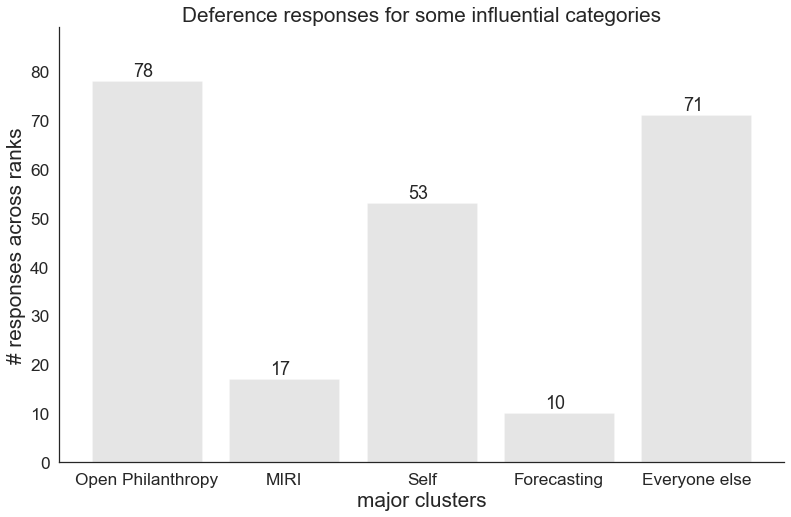

In [18]:
plot_group_clusters(data=result_, sort=False)

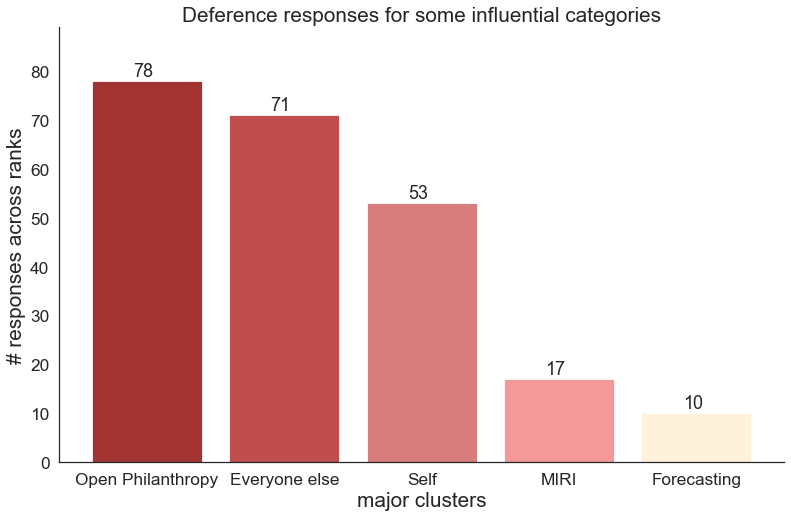

In [19]:
plot_group_clusters(data=result_, sort=True)